# **Compozent - Data Science & Business Analytics Internship**

# **Intermediate Task -  Natural Language Processing (NLP) - Sentiment Analysis**

### Author : TANAY CHOUBEY
[![alt text](https://logoeps.com/wp-content/uploads/2014/02/25231-github-cat-in-a-circle-icon-vector-icon-vector-eps.png "Git Hub Link")](https://github.com/Tanay-Choubey)

### Problem Statement: Develop a program that can process and analyze text data using machine learning algorithms.

### Dataset link: https://www.kaggle.com/datasets/kazanova/sentiment140

### Importing the Libraries

In [1]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

### Loading and Understanding the dataset

In [2]:
columns  = ["sentiment", "ids", "date", "flag", "user", "text"]
data = pd.read_csv("sentiment.csv", encoding = "ISO-8859-1", names = columns)
data.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


As we work on only two columns namely sentiment and text so we can separate thoes two columns.

In [3]:
data = data[['sentiment','text']]
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


<Axes: xlabel='sentiment'>

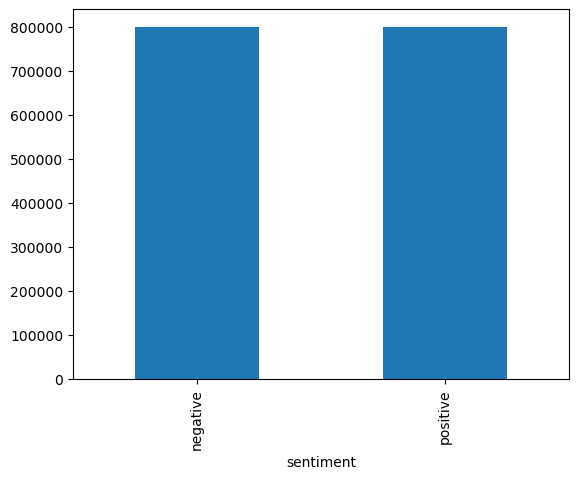

In [4]:
class_dict = {0:'negative', 4:'positive'}
data['sentiment'] = data['sentiment'].apply(lambda x:  class_dict[x])
count = data['sentiment'].value_counts()
count.plot(kind='bar')

### Cleaning the text dataset

In [5]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [6]:
data['text'] = data['text'].apply(clean_text)

data.head()

,sentiment,text
0,negative,switchfoot awww thats a bummer you shoulda ...
1,negative,is upset that he cant update his facebook by t...
2,negative,kenichan i dived many times for the ball manag...
3,negative,my whole body feels itchy and like its on fire
4,negative,nationwideclass no its not behaving at all im ...


### Removing Stopwords

In [7]:
stop_words = stopwords.words('english')

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
data['text'] = data['text'].apply(remove_stopwords)
data.head()

,sentiment,text
0,negative,switchfoot awww thats bummer shoulda got da...
1,negative,upset cant update facebook texting might cry r...
2,negative,kenichan dived many times ball managed save ...
3,negative,whole body feels itchy like fire
4,negative,nationwideclass behaving im mad cant see


### Stemming Technique

In [8]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

data['text'] = data['text'].apply(stemm_text)
data.head()

,sentiment,text
0,negative,switchfoot awww that bummer shoulda got dav...
1,negative,upset cant updat facebook text might cri resul...
2,negative,kenichan dive mani time ball manag save rest...
3,negative,whole bodi feel itchi like fire
4,negative,nationwideclass behav im mad cant see


### Label Encoding

In [9]:
a = LabelEncoder()
a.fit(data['sentiment'])

data['sentiment'] = a.transform(data['sentiment'])
data.head()

,sentiment,text
0,0,switchfoot awww that bummer shoulda got dav...
1,0,upset cant updat facebook text might cri resul...
2,0,kenichan dive mani time ball manag save rest...
3,0,whole bodi feel itchi like fire
4,0,nationwideclass behav im mad cant see


### Separating features and Spiting Data

In [10]:
x = data['text']
y = data['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

### TF-IDF Vectorizer

In [11]:
vectoriser = TfidfVectorizer(ngram_range=(1,2),max_features=3891472)
vectoriser.fit(x_train)

x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)

### Logistic Regression Model

In [12]:
model = LogisticRegression()
model.fit(x_train, y_train)


y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test accuracy: 0.7966
              precision    recall  f1-score   support

           0       0.80      0.79      0.80    199581
           1       0.79      0.80      0.80    200419

    accuracy                           0.80    400000
   macro avg       0.80      0.80      0.80    400000
weighted avg       0.80      0.80      0.80    400000



### Confusion Matrix

Confusion Matrix: [[158138  41443]
 [ 39916 160503]]


<Axes: >

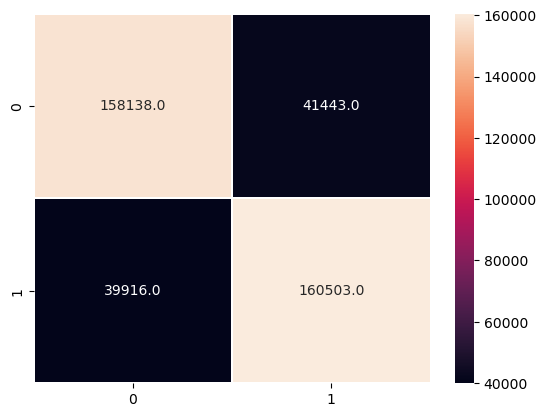

In [13]:
confusion_lg = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix:', confusion_lg)

sns.heatmap(confusion_lg, linewidths=0.01, annot=True,fmt= '.1f', color='red') #heat map

### Prediction

In [14]:
s = ['it is a bad question']
s = vectoriser.transform(s)
sentiment = model.predict(s)

sentiment

array([0])

### Naive Bayes Model

In [15]:
# Creating a Multinomial Naive Bayes model
nb = MultinomialNB()

nb.fit(x_train, y_train)
y_p = nb.predict(x_test)
accuracy = accuracy_score(y_test, y_p)

print(f"Test accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_p))

Test accuracy: 0.7825
              precision    recall  f1-score   support

           0       0.76      0.82      0.79    199581
           1       0.81      0.74      0.77    200419

    accuracy                           0.78    400000
   macro avg       0.78      0.78      0.78    400000
weighted avg       0.78      0.78      0.78    400000



### Stochastic Gradient Descent

In [16]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred = sgd.predict(x_test)

print("Test accuracy score of Stochastic Gradient Descent = ", accuracy_score(y_test, pred)*100)

Test accuracy score of Stochastic Gradient Descent =  75.6465


# **--------------------------------------------Thank You--------------------------------------------**